# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

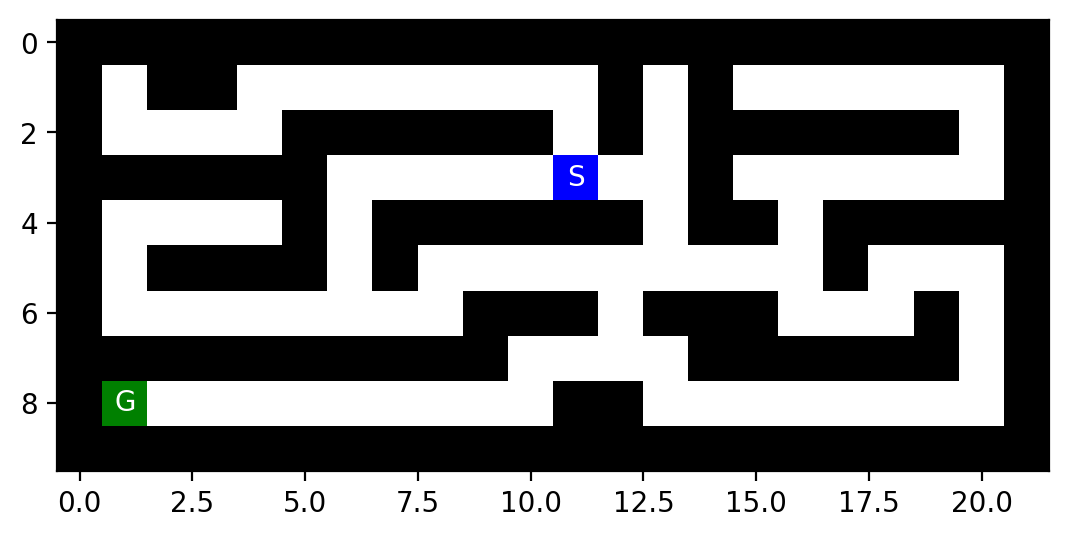

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/shockley/Desktop/School/AI/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost
        self.dist_from_start = len(self.get_path_from_root()) - 1
        self.dist_to_goal = 0         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)
    def __eq__(self,other):
        return self.pos[0] == other.pos[0] and self.pos[1] == other.pos[1]
    def __lt__(self,other):
        return self.cost < other.cost
    def __gt__(self,other):
        return self.cost > other.cost
    def __ge__(self,other):
        return self.cost >= other.cost
    def __le__(self,other):
        return self.cost <= other.cost
    def calc_dist_to_goal(self,goal):
        self.dist_to_goal = abs(self.pos[0] - goal.pos[0]) + abs(self.pos[1] - goal.pos[1])
        return self.dist_to_goal
    def __hash__(self):
        return hash(self.pos)
    def __ne__(self,other):
        return not(self == other)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

#### Initial State
    The initial state of the search problem takes into account where the walls are, where the goal is, and where the agent starts and is used as a starting point for where to go for the agent.
#### Actions
    The valid actions for any agent in this type of discrete environment are moving North, South, East, or West as we forbid the agent from moving diagonaly across the maze.
#### Transition Model
    The transition model determines what state the agent will be in after it takes a certain action. Meaning that if an agent takes an action to move east, what state is it currently in?
#### Goal State
    The goal state for this agent means that the agent is currently standing on the same square as the goal as this means that it has completed the maze
#### Path Cost
    This is a measure of how good or bad a path is, the lower the path cost, the fewer 'moves' the agent had to take to get from the start to the goal. This is used as a metric to determine if a search algorithm is optimal or not.

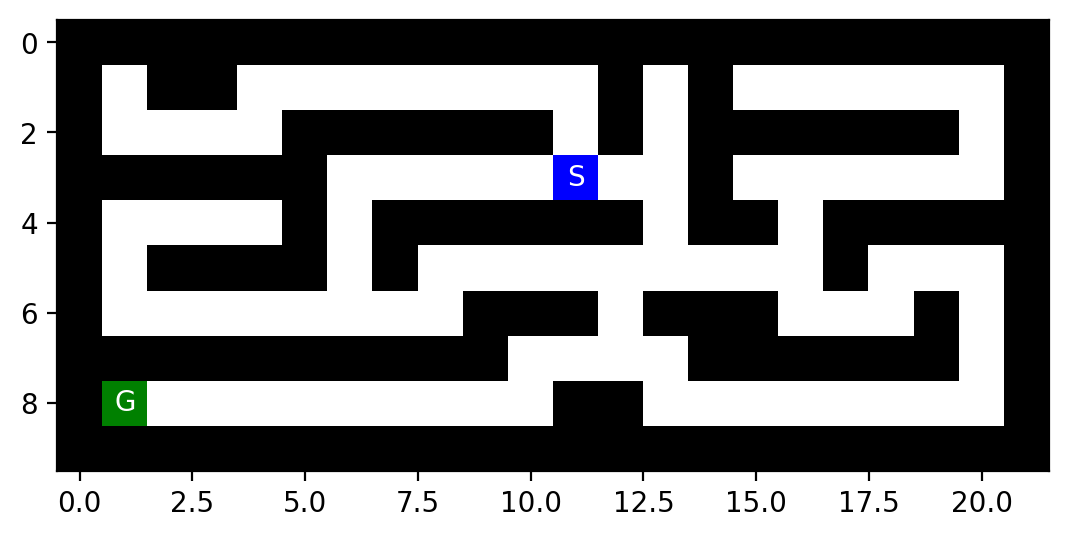

In [7]:
# Your answer goes here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

The state space size could be attributed to the number of spaces in the maze that we are looking at. Meaning the area of the maze minus the number of walls as this is the total number of different positions that our agent could exist in.

The depth of the optimal solution can be estimated such that the lower bound is the manhattan distance from the start to the goal. However, this is not accurate unless there are no walls in the way

The maximum depth of the tree could be estimated to be a value like infinity if there exist loops in a maze because a search algorithm, such as DFS, might continually run in circles and get stuck forever in the loop.

The maximum branching factor for any of the mazes is undoubtedly 4 because this means that from any given node n, there could be a maximum of 4 valid actions: North, South, East, West.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [8]:
import pathlib
import random
import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import colors
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
class helper_functions:
    @classmethod
    def find_children(self,node:Node,maze):
        x_pos = node.pos[0]
        y_pos = node.pos[1]
        children= []
        if(x_pos + 1 <= len(maze[y_pos])):
            if(maze[y_pos][x_pos + 1] != 'X'):
                children.append(Node((x_pos + 1,y_pos),node,'east',1 + node.cost))
        if(x_pos - 1 >= 0 ):
            if(maze[y_pos][x_pos - 1] != 'X'):
                children.append(Node((x_pos - 1,y_pos),node,'west',1 + node.cost))
        if(y_pos - 1 >= 0 ):
            if(maze[y_pos - 1][x_pos] != 'X'):
                children.append(Node((x_pos,y_pos - 1),node,'north',1 + node.cost))
        if(y_pos + 1 <= len(maze)):
            if(maze[y_pos + 1][x_pos] != 'X'):
                children.append(Node((x_pos,y_pos + 1),node,'south',1 + node.cost))
        random.shuffle(children)
        return (children)
    @classmethod
    def print_path(self,path):
        for val in path:
            print(val.pos,'--> ',end='')
    @classmethod
    def paint_path(self,path,maze,value):
        for val in path:
            if  maze[val.pos[1]][val.pos[0]] != 'S' and maze[val.pos[1]][val.pos[0]] != 'G':
                maze[val.pos[1]][val.pos[0]] = value

    @classmethod
    def open_maze(self,filename):
        with open(filename, "r") as f:
            maze_str = f.read()
        return mh.parse_maze(maze_str)

    @classmethod
    def maze_to_matrix(self,maze):  
        """convert a maze a numeric numpy array for visualization via imshow."""

        # make a deep copy first so the original maze is not changed
        maze = np.copy(maze)
        
        # Converts all tile types to integers
        maze[maze == ' '] = 0
        maze[maze == 'X'] = 1 # wall
        maze[maze == 'S'] = 2 # start
        maze[maze == 'G'] = 3 # goal
        maze[maze == 'P'] = 4 # position/final path
        maze[maze == '.'] = 5 # explored squares
        maze[maze == 'F'] = 6 # frontier
        maze = maze.astype(int)
        
        return(maze)
    
 
# Based on show_maze but modified to generate animation (suggested by Troy Jeffrey McNitt)
# Sadly I can not embed the animations in the PDF I have to submit :(
    @classmethod
    def animate_maze(self,result, fileName,repeat = False):
            """Build an animation from a list of mazes. Assumes that results has the elements:
            path, reached, actions and maze_anim with a list of maze arrays."""
            
            if result['path'] != None:       
                print(f"Path length: {len(result['path'])-1}")
                print(f"Reached squares: {len(result['reached'])}")
                # print(f"Action sequence: {result['actions']}")
            else:
                print("No solution found.")
            
            
            mazes = result['maze_anim']
            
            cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
    
            goal = mh.find_pos(mazes[0], 'G')
            start = mh.find_pos(mazes[0], 'S')
    
            mazes = [self.maze_to_matrix(m) for m in mazes]

            fig, ax = mh.plt.subplots()
            im = ax.imshow(self.maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
    
            mh.plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                    horizontalalignment = 'center',
                    verticalalignment = 'center')
    
            mh.plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                    horizontalalignment = 'center',
                    verticalalignment = 'center')

            def step(i):  
                    im.set_array(self.maze_to_matrix(mazes[i]))
                    return([im])
    
            ani = animation.FuncAnimation(
                fig, 
                step, 
                frames = len(mazes),
                repeat = repeat
            )
    
            mh.plt.close()
            ani.save('gifs/'+fileName,writer='ffmeg')
            # return ani
        



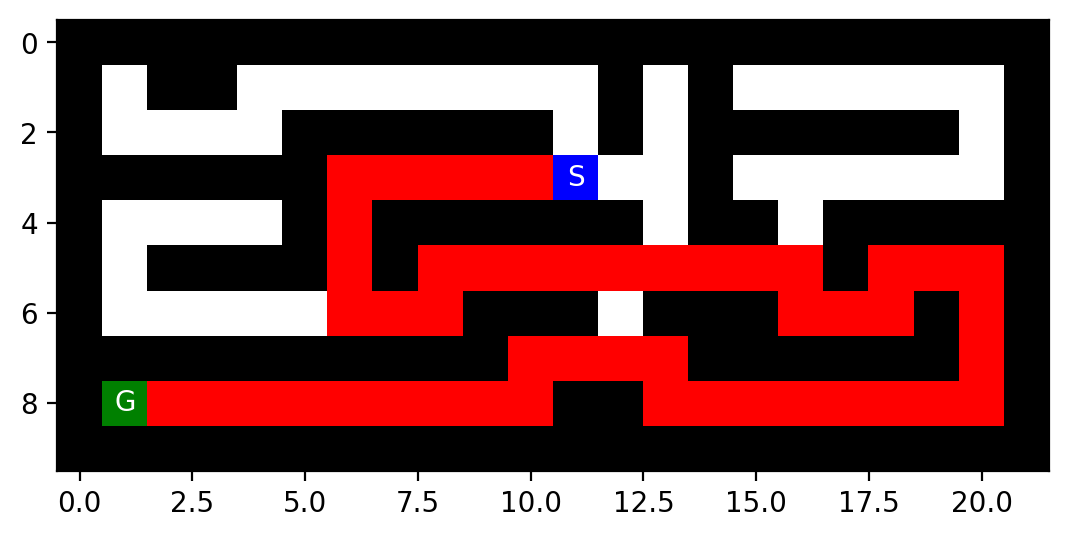

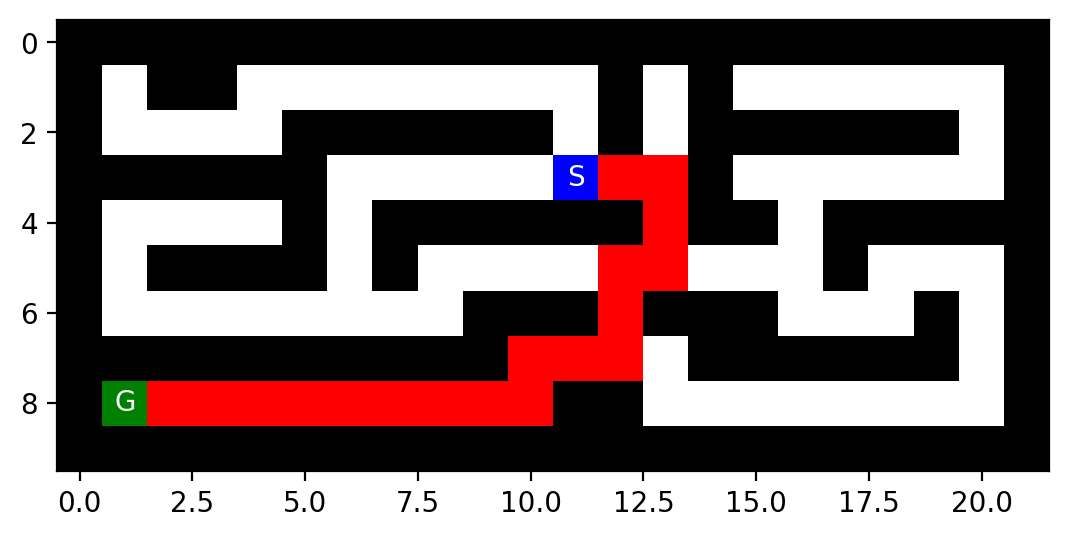

In [9]:
# Your code goes here
def breadth_first_search(maze, animate=False):
    start = Node(mh.find_pos(maze, what = "S"),None,None,0)
    start.pos = (start.pos[1],start.pos[0])
    goal = Node(mh.find_pos(maze,what="G"),None,None,0)
    goal.pos = (goal.pos[1],goal.pos[0])
    queue = [start]
    reached = [start]
    mazes = []
    i = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_num_nodes_memory = 0
    max_frontier_size = 0
    while (len(queue) != 0):
        # print(i)
        if(animate):
            currMaze = maze.copy()
            helper_functions.paint_path(reached,currMaze,'.')
            helper_functions.paint_path(queue,currMaze,'F')
            mazes.append(currMaze)
        i += 1
        if(len(queue) > max_frontier_size): max_frontier_size = len(queue)
        
        curr = queue.pop(0)
        if(len(curr.get_path_from_root()) > max_tree_depth): max_tree_depth = len(curr.get_path_from_root())
        num_nodes_expanded = num_nodes_expanded + 1
        if(len(queue) + len(reached) > max_num_nodes_memory): max_num_nodes_memory = len(queue) + len(reached)
        
        for child in helper_functions.find_children(curr,maze):
            if(child == goal or maze[child.pos[1]][child.pos[0]] == 'G'):
                full_path = child.get_path_from_root()
                final_path_maze = maze.copy()
                helper_functions.paint_path(full_path,final_path_maze,'P')
                mazes.append(final_path_maze)
                if(animate):
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                return {
                    'success':True,
                    'num_nodes_expanded': num_nodes_expanded,
                    'max_tree_depth': max_tree_depth + 1,
                    'max_num_nodes_memory': max_num_nodes_memory,
                    'max_frontier_size': max_frontier_size,
                    'path':full_path,
                    'maze_anim':mazes,
                    'reached':reached,
                    
                }
            if(child not in reached):
                queue.append(child)
                reached.append(child)
    return {
        'success':False,
        'num_nodes_expanded': num_nodes_expanded,
        'max_tree_depth': max_tree_depth,
        'max_num_nodes_memory': max_num_nodes_memory,
        'max_frontier_size': max_frontier_size,
        'path':None,
        'maze_anim':mazes,
        'reached':reached,
    }
def depth_first_search(maze, animate=False):
    start = Node(mh.find_pos(maze, what = "S"),None,None,0)
    start.pos = (start.pos[1],start.pos[0])
    goal = Node(mh.find_pos(maze,what="G"),None,None,0)
    goal.pos = (goal.pos[1],goal.pos[0])
    queue = [start]
    reached = [start]
    mazes = []
    i = 0
    while (len(queue) != 0):
        # print(i)
        if(animate):
            currMaze = maze.copy()
            helper_functions.paint_path(reached,currMaze,'.')
            helper_functions.paint_path(queue,currMaze,'F')
            mazes.append(currMaze)
        i += 1
        curr = queue.pop()
        for child in helper_functions.find_children(curr,maze):
            if(child == goal):
                full_path = child.get_path_from_root()
                final_path_maze = maze.copy()
                helper_functions.paint_path(full_path,final_path_maze,'P')
                mazes.append(final_path_maze)
                if(animate):
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                    mazes.append(final_path_maze)
                return {
                    'success':True,
                    'path':full_path,
                    'maze_anim':mazes,
                    'reached':reached,
                    
                }
            if(child not in reached):
                queue.append(child)
                reached.append(child)
    return {
        'success':False,
        'path':None,
        'maze_anim':mazes,
        'reached':reached,
    }
def optimal_dfs(maze, max_length=5000,animate=False):
    start = Node(mh.find_pos(maze, what = "S"),None,None,0)
    start.pos = (start.pos[1],start.pos[0])
    goal = Node(mh.find_pos(maze,what="G"),None,None,0)
    goal.pos = (goal.pos[1],goal.pos[0])
    frontier = [start]
    mazes = []
    i = 0
    result = False
    curr_length = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_num_nodes_memory = 0
    max_frontier_size = 0
    while(len(frontier) != 0):
        if(len(frontier) > max_frontier_size): max_frontier_size = len(frontier)
        curr_node = frontier.pop()
        
        if(len(curr_node.get_path_from_root()) > max_tree_depth): max_tree_depth = len(curr_node.get_path_from_root())
        num_nodes_expanded = num_nodes_expanded + 1
        if(len(frontier) + len(curr_node.get_path_from_root()) > max_num_nodes_memory): max_num_nodes_memory = len(frontier) + len(curr_node.get_path_from_root())
        
        if(animate):
            currMaze = maze.copy()
            helper_functions.paint_path(frontier,currMaze,'F')
            helper_functions.paint_path(curr_node.get_path_from_root(),currMaze,'.')
            mazes.append(currMaze)
        # print(i)
        i += 1
        if curr_node == goal or maze[curr_node.pos[1]][curr_node.pos[0]] == 'G':
            full_path = child.get_path_from_root()
            final_path_maze = maze.copy()
            helper_functions.paint_path(full_path,final_path_maze,'P')
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            return {
                'success':True,
                'num_nodes_expanded': num_nodes_expanded,
                'max_tree_depth': max_tree_depth,
                'max_num_nodes_memory': max_num_nodes_memory,
                'max_frontier_size': max_frontier_size,
                'path': curr_node.get_path_from_root(),
                'maze_anim':mazes,
                'reached': [],
                'cutoff': result
            }

        path_from_root = curr_node.get_path_from_root()[:-1]
        if curr_node.dist_from_start > max_length:
            result = True

        elif curr_node not in path_from_root:
            for child in helper_functions.find_children(curr_node,maze):
                frontier.append(child)

    return {
        'success': False,
        'num_nodes_expanded': num_nodes_expanded,
        'max_tree_depth': max_tree_depth,
        'max_num_nodes_memory': max_num_nodes_memory,
        'max_frontier_size': max_frontier_size,
        'path':None,
        'maze_anim':mazes,
        'reached':[],
        'cutoff':result
    }


maze = helper_functions.open_maze('small_maze.txt')

result = optimal_dfs(maze,animate=False,max_length=75)
mh.show_maze(result['maze_anim'][-1])
result = breadth_first_search(maze,animate=False)
mh.show_maze(result['maze_anim'][-1])
# print(result)
# result['path'] = [Node((0,0),None,'east',0)]
# result['reached'] = []
# helper_functions.animate_maze(result,repeat=False,fileName='DFS_optimal_loops_maze.gif')


How does BFS and DFS deal with loops (cycles)?

## Discussion
### BFS
    The way that BFS handles cycles is by having a reached data structure that contains all of the already visited nodes. By checking if one of the potential child nodes already exists in this reached DS, BFS is able to simply not revisit nodes that it has already seen before/are in the current path.
### DFS
    The unoptimized version of DFS also contains a reached data structure and avoids loops in the same way that BFS does. However, the optimized version of DFS only keeps track of the path from it's current frontier node back to the start. This means that it is possible for a node to be visited multiple times, but it will keep track of the path from the current node to the start. This means that the algorithm will never get stuck in a back and forth situation where it continues to run to it's previous node and back again.


Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

## Discussion
### BFS
    BFS is optimal because it will always find the shortest path to the goal by searching each level at a time where a level is one more space away from the start than a previous level. It is also complete because it will find a path if it exists (eventually). The time complexity is equal to b^d where b is the number of nodes created in each level of the tree and d is the depth of the tree. The space complexity is also b^d because it stores every node that it sees in the visited data structure.

### DFS
    DFS is not optimal because it will return the first path that it finds. The reason that this is a problem is that it will fully explore a path before going back to the frontier, so it will exhaust one entire path first and if that path is able to get to the goal it will return that without checking to see if there was a potentially better option. The time complexity is O(b^m) where b is the branching factor and m is the max depth of the tree. The space complexity however is O(bm) which is really good compared to other search algorithms.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

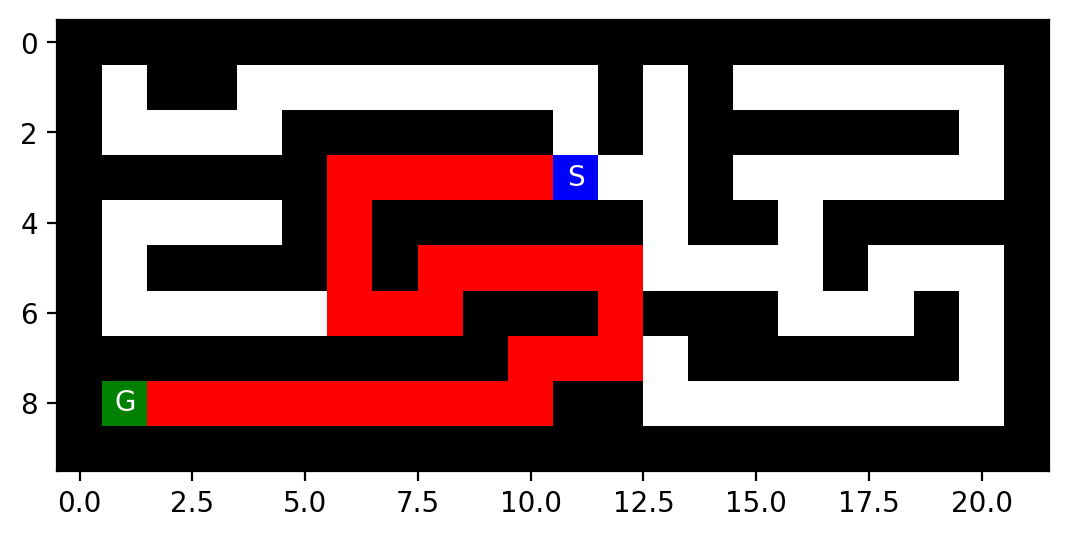

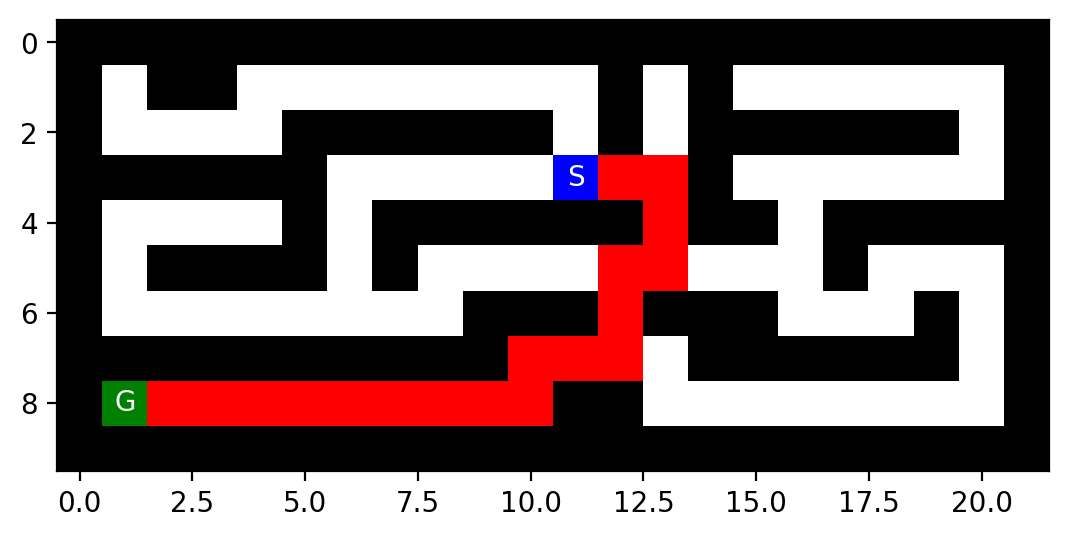

In [10]:
# Your code goes here
def greedy_BFS(maze,animate=False):
    start = Node(mh.find_pos(maze, what = "S"),None,None,0)
    start.pos = (start.pos[1],start.pos[0])
    goal = Node(mh.find_pos(maze,what="G"),None,None,0)
    goal.pos = (goal.pos[1],goal.pos[0])
    frontier = [start]
    mazes = []
    i = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_num_nodes_memory = 0
    max_frontier_size = 0
    reached = {start:start.cost}
    while(len(frontier) != 0 ):
        if(animate):
            currMaze = maze.copy()
            helper_functions.paint_path(reached,currMaze,'.')
            helper_functions.paint_path(frontier,currMaze,'F')
            mazes.append(currMaze)
        
        frontier.sort()
        if(len(frontier) > max_frontier_size): max_frontier_size = len(frontier)
        curr_node = frontier.pop(0)
        if(len(curr_node.get_path_from_root()) > max_tree_depth): max_tree_depth = len(curr_node.get_path_from_root())
        num_nodes_expanded = num_nodes_expanded + 1
        if(len(frontier) + len(reached) > max_num_nodes_memory): max_num_nodes_memory = len(frontier) + len(reached)
        
        if(curr_node == goal):
            full_path = curr_node.get_path_from_root()
            final_path_maze = maze.copy()
            helper_functions.paint_path(full_path,final_path_maze,'P')
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            return {
                'success':True,
                'num_nodes_expanded': num_nodes_expanded,
                'max_tree_depth': max_tree_depth,
                'max_num_nodes_memory': max_num_nodes_memory,
                'max_frontier_size': max_frontier_size,
                'path': curr_node.get_path_from_root(),
                'maze_anim':mazes,
                'reached': reached
            }
        for child in helper_functions.find_children(curr_node,maze):
            child.cost = child.calc_dist_to_goal(goal)
            if child not in reached or child.cost < reached[child]:
                reached[child] = child.cost
                frontier.append(child)
                frontier.sort()
    return {
        'success':False,
        'num_nodes_expanded': num_nodes_expanded,
        'max_tree_depth': max_tree_depth,
        'max_num_nodes_memory': max_num_nodes_memory,
        'max_frontier_size': max_frontier_size,
        'path': None,
        'maze_anim':mazes,
        'reached': reached
    }

def a_star(maze,animate=False):
    start = Node(mh.find_pos(maze, what = "S"),None,None,0)
    start.pos = (start.pos[1],start.pos[0])
    goal = Node(mh.find_pos(maze,what="G"),None,None,0)
    goal.pos = (goal.pos[1],goal.pos[0])
    frontier = [start]
    mazes = []
    i = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_num_nodes_memory = 0
    max_frontier_size = 0
    reached = {start:start.cost}
    while(len(frontier) != 0 ):
        
        if(animate):
            currMaze = maze.copy()
            helper_functions.paint_path(reached,currMaze,'.')
            helper_functions.paint_path(frontier,currMaze,'F')
            mazes.append(currMaze)
        
        frontier.sort()
        if(len(frontier) > max_frontier_size): max_frontier_size = len(frontier)
        
        curr_node = frontier.pop(0)
        if(len(curr_node.get_path_from_root()) > max_tree_depth): max_tree_depth = len(curr_node.get_path_from_root())
        num_nodes_expanded = num_nodes_expanded + 1
        if(len(frontier) + len(reached) > max_num_nodes_memory): max_num_nodes_memory = len(frontier) + len(reached)
        if(curr_node == goal):
            full_path = curr_node.get_path_from_root()
            final_path_maze = maze.copy()
            helper_functions.paint_path(full_path,final_path_maze,'P')
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            mazes.append(final_path_maze)
            return {
                'success':True,
                'num_nodes_expanded': num_nodes_expanded,
                'max_tree_depth': max_tree_depth,
                'max_num_nodes_memory': max_num_nodes_memory,
                'max_frontier_size': max_frontier_size,
                'path': curr_node.get_path_from_root(),
                'maze_anim':mazes,
                'reached': reached
            }
        for child in helper_functions.find_children(curr_node,maze):
            child.cost = child.calc_dist_to_goal(goal) + len(child.get_path_from_root()) - 1
            if child not in reached or child.cost < reached[child]:
                reached[child] = child.cost
                frontier.append(child)
                frontier.sort()
    return {
        'success':False,
        'num_nodes_expanded': num_nodes_expanded,
        'max_tree_depth': max_tree_depth,
        'max_num_nodes_memory': max_num_nodes_memory,
        'max_frontier_size': max_frontier_size,
        'path': None,
        'maze_anim':mazes,
        'reached': reached
    }  


maze = helper_functions.open_maze('small_maze.txt')

result = greedy_BFS(maze,animate=False)

mh.show_maze(result['maze_anim'][-1])

result = a_star(maze,animate=False)

mh.show_maze(result['maze_anim'][-1])
# helper_functions.animate_maze(result,repeat=False,fileName='Greedy_small_maze.gif')

Are your implementations complete and optimal? What is the time and space complexity?

## Discussion
### GBS
    Greedy best first search is complete in that it will always find a solution in a finite space (assuming a possible solution exists) however, it is not optimal. It is not optimal because it only looks at the heuristic value to determine if it's next move is a good one. This could cause it to take a longer total path to get to the goal because it tried to rush straight to it completely disreguarding how far is has already moved from the start. The time complexity and space complexity is O(b^m) where b is the max branching factor and m is the max depth of the tree. 
### A Star
    A star search is complete in finite spaces because it will always find the solution if one exists, but unlike GFS, it is also optimal. A star is optimal because it takes into account a heuristic as well as how far it has already traveled. This removes the problem that GBS has because A star will notice if it has gone too far from the start and back track to a different frontier node to see if it is possible to move in such a way that the heuristic value may rise temporarily which allows it to find the optimal path.

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [11]:
# Add code
import json
def run_all_search(maze_file_path,algos,num_iterations=10):
    
    result = {}
    maze = helper_functions.open_maze(maze_file_path)
    for val in algos:
        values = {
            'path_cost':0,
            'num_nodes_expanded':0,
            'max_tree_depth':0,
            'max_num_nodes_memory':0,
            'max_frontier_size':0
        }
        
        for i in range(num_iterations):
            curr_result = algos[val](maze,animate=False)
            values['path_cost'] += len(curr_result['path'])
            values['num_nodes_expanded'] += curr_result['num_nodes_expanded']
            values['max_tree_depth'] += curr_result['max_tree_depth']
            values['max_num_nodes_memory'] += curr_result['max_num_nodes_memory']
            values['max_frontier_size'] += curr_result['max_frontier_size']
        for entry in values:
            values[entry] = values[entry] / num_iterations
        result[val] = values
    return result

algos = {
        'BFS':breadth_first_search,
        'GBS':greedy_BFS,
        'A_Star':a_star
    }

res = run_all_search('loops_maze.txt',algos,num_iterations=10)

print('| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |')
print('|-----------|-----------|----------------|----------------|---------------|-------------------|')
for val in res:
    print('|',val,end='\t|')
    for name in res[val]:
        print(res[val][name],end='\t|')
    print()

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS	|24.0	|70.0	|24.0	|72.0	|7.9	|
| GBS	|24.0	|52.0	|24.0	|69.4	|9.7	|
| A_Star	|24.0	|60.0	|24.0	|66.0	|6.0	|


Complete the following table for each maze.
Note that the DFS implementation took too long to finish open mazes or mazes wirh loops because it's ability to determine which square to go to next was randomized so it would continually attempt to get out by just choosing the correct random value
__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |20.0           |   90.1             |   19.0             |    93.2           |     8.7              |
| DFS       |38.0           |94.6                |40.4                |64.8               |25.5                   |
| GBS       |30.0           |40.0                |30.0                |48.0               |5.0                   |
| A*        |20.0           |54.0                |20.0                |65.0               |8.0                   |

__Medium Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS          |69.0           |266.1             |68.0             |271.4           |8.1              |
| DFS       |147.6.0           |325.7                |156.6                |243.4               |88.3                   |
| GBS       |129.6.0           |135.1.0                |129.6.0                |146.7              |6.8                   |
| A*        |69.0           |223.0                |69.0                |234.0               |8.0                   |

__Large Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS	|211.0	|617.3	|210.0	|623.3	|8.1	|
| DFS	|211.0	|782.4	|221.2	|364.1	|144.1	|
| GBS	|211.0	|461.3	|211.0	|504.1	|22.4	|
| A_Star	|211.0	|550.0	|211.0	|564.0	|12.0	|

__Wall Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS	|15.0	|84.9	|14.0	|91.0	|9.8	|
| GBS	|15.8	|20.0	|15.8	|68.0	|25.0	|
| A_Star	|15.0	|57.0	|15.0	|117.0	|31.0	|

__Empty Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS	|15.0	|91.6	|14.0	|98.3	|12.0	|
| GBS	|15.0	|15.0	|15.0	|61.4	|24.2	|
| A_Star	|15.0	|64.0	|15.0	|124.0	|31.0	|

__Empty 2 Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS	|15.0	|91.7	|14.0	|98.1	|12.0	|
| GBS	|15.0	|15.0	|15.0	|60.0	|23.5	|
| A_Star	|15.0	|64.0	|15.0	|124.0	|31.0	|

__L Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS	|15.0	|135.1	|14.0	|147.2	|18.5	|
| GBS	|17.8	|23.2	|17.8	|72.0	|25.4	|
| A_Star	|15.0	|43.0	|15.0	|89.0	|24.0	|

__Loops Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS	|24.0	|70.0	|23.0	|72.0	|7.8	|
| GBS	|24.0	|52.0	|24.0	|69.4	|9.8	|
| A_Star	|24.0	|60.0	|24.0	|66.0	|5.9	|


Discuss the most important lessons you have learned from implementing the different search strategies. 

The most important thing that I learned was how much memory some of these algorithms require to find the correct solution due to how some of them need to be able to avoid cycles. It was also interesting to create a search algorithm that did not use an adjacency list because that was all that I have done up until this point. Another important thing that I realized was that DFS, when implemented correctly for AI, is a useful tool because it is able to clear the nodes from memory. However, this really only works in mazes that are not open and do not have loops because it's way of getting out of a loop was by randomly choosing the order to add child nodes to the frontier such that it would eventually get lucky and get out of the loop but this is not a very practical solution.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [12]:
def IDS(maze, animate=False):
    for i in range(5000):
        result = optimal_dfs(maze,max_length=i,animate=animate)
        if result['success']:
            return result
    return {
        'success':False
    }
    

algos = {
    'IDS': IDS,
    'DFS':optimal_dfs,
    'BFS':breadth_first_search
}

res = run_all_search('medium_maze_2_goal.txt',algos,num_iterations=10)

print('| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |')
print('|-----------|-----------|----------------|----------------|---------------|-------------------|')
for val in res:
    print('|',val,end='\t|')
    for name in res[val]:
        print(res[val][name],end='\t|')
    print()

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| IDS	|35.0	|135.1	|35.0	|57.1	|23.1	|
| DFS	|93.0	|185.3	|100.6	|159.1	|59.5	|
| BFS	|35.0	|109.8	|35.0	|123.8	|8.2	|


### Disussion
    Both IDS and BFS were able to find the optimal solution path because BFS will always find the shortest path and IDS will basically run optimized DFS with increasing max depths until it finds the solution. Previously, DFS was unable to find the optimal solution because it would run all the way down a single path and return the first valid path that it found but IDS removes this issue by having DFS act a bit more like BFS in that it will only go so far from the start node each time. By setting the step size of IDS to 1, we are able to ensure that the best solution is found while also being able to keep the number of nodes in memory to a minimum (as can be seen in the chart below).

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| IDS	|35.0	|162.9	|35.0	|58.0	|24.0	|
| DFS	|99.2	|241.9	|125.5	|199.6	|75.1	|
| BFS	|35.0	|109.1	|35.0	|123.2	|8.1	|

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [13]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [14]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [15]:
# Your code/answer goes here